In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [12]:
imp=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\india exportandimport\2018-2010_import.csv")
exp=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\india exportandimport\2018-2010_export.csv")

In [13]:
imp.columns=imp.columns.str.strip()
exp.columns=exp.columns.str.strip()

In [14]:
exp

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018
...,...,...,...,...,...
137018,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.03,ZIMBABWE,2010
137019,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.45,ZIMBABWE,2010
137020,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,0.00,ZIMBABWE,2010
137021,98,PROJECT GOODS; SOME SPECIAL USES.,0.00,ZIMBABWE,2010


In [5]:
grouped=exp.groupby(["year","country"])["value"].sum().reset_index()
grouped["AllTimeValueByCountry"]=grouped.groupby("country")["value"].transform(lambda x:x.sum())
grouped=grouped.sort_values("AllTimeValueByCountry",ascending=False)

pivoted=grouped.pivot("country","year","value").reset_index()
pivoted["total"]=pivoted.sum(axis=1)
pivoted=pivoted.sort_values("total",ascending=False).head(10)
pivoted

C:\Users\berid\AppData\Local\Temp\ipykernel_13304\1134295235.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pivoted["total"]=pivoted.sum(axis=1)


year,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,total
231,U S A,25291.56,34741.33,36154.88,39141.81,42448.30,40335.68,42211.96,47878.17,52405.88,360609.57
229,U ARAB EMTS,33822.08,35925.23,36316.29,30520.08,33027.73,30316.16,31175.16,28145.77,30126.38,289374.88
44,CHINA P RP,14168.65,18076.34,13534.66,14824.16,11934.07,9011.19,10171.66,13333.33,16751.94,121806.00
97,HONG KONG,10320.10,12931.71,12279.01,12731.55,13599.74,12092.16,14047.13,14690.11,13001.84,115693.35
193,SINGAPORE,9825.25,16857.45,13619.00,12510.31,9809.17,7719.59,9564.32,10202.57,11572.04,101679.70
230,U K,7284.66,8589.64,8612.22,9778.78,9319.48,8828.26,8529.76,9690.82,9308.99,79942.61
81,GERMANY,6750.90,7942.53,7245.91,7515.55,7537.06,7092.58,7181.25,8687.49,8902.18,68855.45
154,NETHERLAND,7677.42,9151.05,10564.80,7995.42,6324.52,4724.91,5069.49,6260.95,8812.61,66581.17
188,SAUDI ARAB,4684.17,5683.06,9785.56,12218.72,11161.21,6381.23,5110.09,5410.42,5561.53,65995.99
235,UNSPECIFIED,14390.17,16436.70,5437.45,11544.48,4161.22,2482.88,2470.11,2429.67,2907.21,62259.89


# plot exported value for 10 main countries 

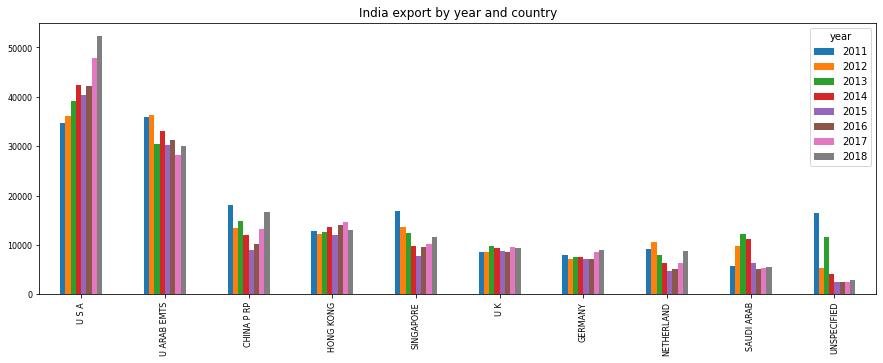

In [6]:
pivoted.plot(figsize=(15,5),kind="bar",x="country",y=pivoted.columns[2:-1],fontsize=8,xlabel="",stacked=False)
plt.title("India export by year and country")
plt.show()

# Find 2 most frequently exported commodities together for each year

In [127]:
from itertools import combinations
from collections import Counter
mycounter=Counter()

for i in exp.year.unique():
    for row in exp[exp.year==i]["Commodity"]:
        row_list=row.split(";")
        mycounter.update(Counter(combinations(row_list,2)))
    for key,value in mycounter.most_common(1):
        print(i,key,value)

2018 ('NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES', ' PARTS THEREOF.') 224
2017 ('NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES', ' PARTS THEREOF.') 444
2016 ('NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES', ' PARTS THEREOF.') 662
2015 ('ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF', ' SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.') 877
2014 ('ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF', ' SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.') 1093
2013 ('NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES', ' PARTS THEREOF.') 1309
2012 ('NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES', ' PARTS THEREOF.') 1521
2011 ('ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF', ' SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.') 1741
2010 ('ELECTRICAL MA

# find most frequently exported commodities from India for yeach country 

In [5]:
data={}
for i in exp.country.unique():
    for x in exp.year.unique():
        grouped=exp[(exp.country==i)&(exp.year==x)].Commodity.str.split("; ",expand=True).stack().value_counts()
        print(x,i,grouped.head(1))

2018 AFGHANISTAN TIS MEAT AND EDIBLE MEAT OFFAL.    1
dtype: int64
2017 AFGHANISTAN TIS PARTS AND ACCESSORIES THEREOF.    2
dtype: int64
2016 AFGHANISTAN TIS PARTS AND ACCESSORIES THEREOF.    2
dtype: int64
2015 AFGHANISTAN TIS PARTS AND ACCESSORIES THEREOF.    2
dtype: int64
2014 AFGHANISTAN TIS PARTS AND ACCESSORIES THEREOF.    2
dtype: int64
2013 AFGHANISTAN TIS PARTS AND ACCESSORIES THEREOF.    2
dtype: int64
2012 AFGHANISTAN TIS LIVE ANIMALS.    1
dtype: int64
2011 AFGHANISTAN TIS MEAT AND EDIBLE MEAT OFFAL.    1
dtype: int64
2010 AFGHANISTAN TIS MEAT AND EDIBLE MEAT OFFAL.    1
dtype: int64
2018 ALBANIA FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.    1
dtype: int64
2017 ALBANIA FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.    1
dtype: int64
2016 ALBANIA FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.    1
dtype: int64
2015 ALBANIA FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.    1
dtype: int64
2014 ALBANIA FIS

# plot export value by country(top 20) and cumulative percent of total value of these top20

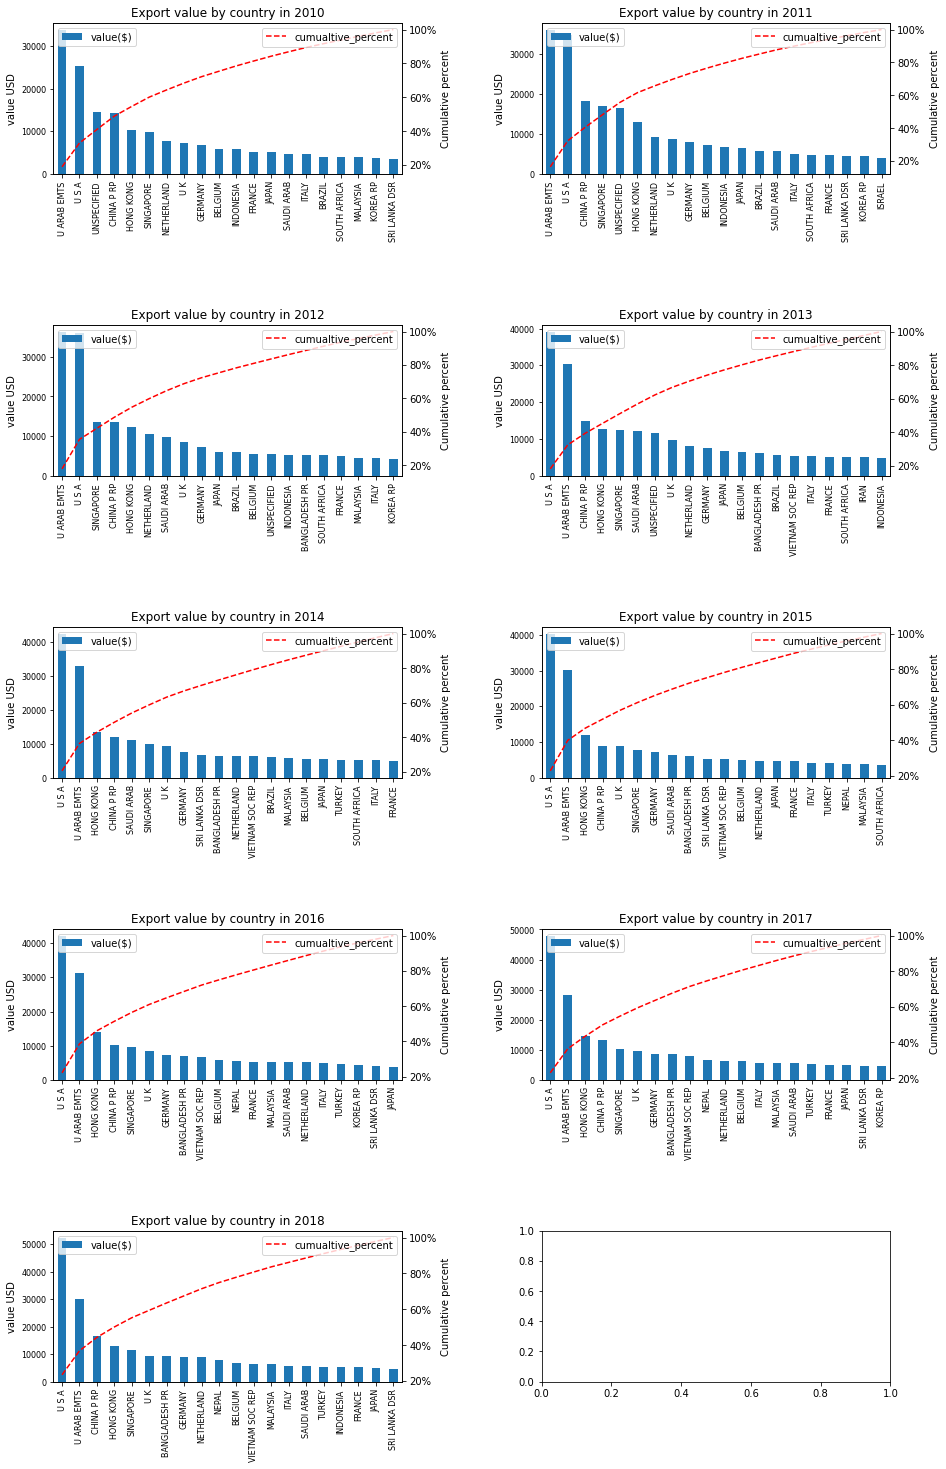

In [29]:
import matplotlib.ticker as mtick
fig,axes=plt.subplots(5,2,figsize=(15,25))
years=sorted(exp.year.unique())

for ax,year in zip(axes.ravel(),years):
    grouped=exp[exp.year==year].groupby("country")["value"].sum().reset_index().sort_values("value",ascending=False).head(20)
    grouped["percent"]=grouped.value/grouped.value.sum()*100
    grouped["cumulative_percent"]=grouped.percent.cumsum()
    
    grouped.plot(kind="bar",ax=ax,x="country",y="value",legend=True,xlabel="",ylabel="",fontsize=8,label="value($)")
    ax.set_ylabel("value USD")
    ax.legend(loc="upper left")
    
    ax2=ax.twinx()
    ax2.plot(grouped.country,grouped.cumulative_percent,ls="--",color="r",label="cumualtive_percent")
    ax2.set_ylabel("Cumulative percent")
    
    plt.subplots_adjust(hspace=1,wspace=0.4)
    plt.legend(loc="upper right")
    plt.title("Export value by country in "+str(year))
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.show()


# find countries where Indian export annual increase never dropped below zero percent 

In [40]:
grouped=exp.groupby(["country","year"])["value"].sum().reset_index().sort_values(["country","year"])
grouped["prev_year"]=grouped.groupby("country")["value"].apply(lambda x:x.shift(1))
grouped["increase_vs_prev_year"]=((100*grouped.value-grouped.prev_year)/grouped.prev_year-100).round(1)
grouped

,country,year,value,prev_year,increase_vs_prev_year
0,AFGHANISTAN TIS,2010,422.31,NaN,NaN
1,AFGHANISTAN TIS,2011,510.81,422.31,20.0
2,AFGHANISTAN TIS,2012,472.55,510.81,-8.5
3,AFGHANISTAN TIS,2013,474.26,472.55,-0.6
4,AFGHANISTAN TIS,2014,422.48,474.26,-11.9
...,...,...,...,...,...
2128,ZIMBABWE,2014,223.84,157.96,40.7
2129,ZIMBABWE,2015,205.01,223.84,-9.4
2130,ZIMBABWE,2016,109.02,205.01,-47.8
2131,ZIMBABWE,2017,163.46,109.02,48.9


In [54]:
s = grouped[grouped.increase_vs_prev_year.isna()==False]["increase_vs_prev_year"].gt(0).groupby(grouped["country"]).all()
out = s.index[s].tolist()
out

['ALBANIA', 'JAMAICA', 'SERBIA', 'SOUTH SUDAN ', 'STATE OF PALEST']

# Are there any countries where Indian export for one year was always greater than previous year. Less than previous year

In [72]:
s=(grouped.value>grouped.prev_year).groupby(grouped["country"]).all()

#s=(grouped.value<grouped.prev_year).groupby(grouped["country"]).all()
out = s.index[s].tolist()
out

[]

### There were none 

# Indian export increase year by year

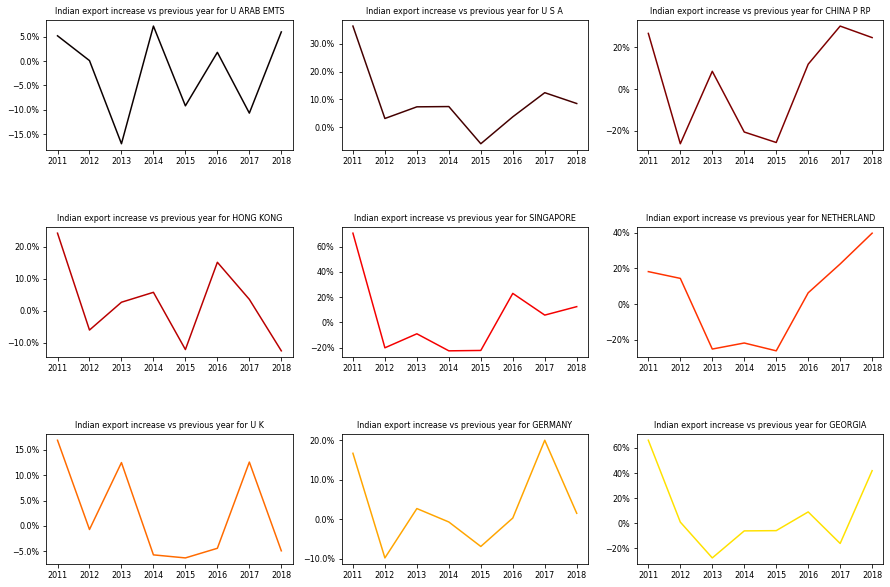

In [89]:
import matplotlib.ticker as mtick
countries=["U ARAB EMTS","U S A","CHINA P RP","HONG KONG","SINGAPORE","NETHERLAND","U K","GERMANY","GEORGIA"]
fig,axes=plt.subplots(3,3,figsize=(15,10))
cmap=plt.get_cmap("hot")
colors=list(cmap(np.linspace(0,0.7,len(countries))))

for ax,country,color in zip(axes.ravel(),countries,colors):
    grouped[grouped.country==country].plot(ax=ax,kind="line",x="year",y="increase_vs_prev_year",xlabel="",legend=False,color=color,fontsize=8)
    ax.set_title("Indian export increase vs previous year for "+country,size=8)
    plt.subplots_adjust(hspace=0.6)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.show()

# Merge dataframes

In [90]:
merged=exp.merge(imp, on =["country","year"])

# What was the most frequently imported commodities in India for each year 

In [107]:
data={}
for i in imp.country.unique():
    for x in imp.year.unique():
        grouped=imp[(imp.country==i)&(imp.year==x)].Commodity.str.split("; ",expand=True).stack().value_counts()
        print(x,i,grouped.head(1))

2018 AFGHANISTAN TIS PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.    1
dtype: int64
2017 AFGHANISTAN TIS EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.    1
dtype: int64
2016 AFGHANISTAN TIS EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.    1
dtype: int64
2015 AFGHANISTAN TIS EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.    2
dtype: int64
2014 AFGHANISTAN TIS EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.    1
dtype: int64
2013 AFGHANISTAN TIS EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.    1
dtype: int64
2012 AFGHANISTAN TIS EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.    1
dtype: int64
2011 AFGHANISTAN TIS EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.    1
dtype: int64
2010 AFGHANISTAN TIS EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.    1
dtype: int64
2018 ALBANIA OIL SEEDS AND OLEA. FRUITS    1
dtype: int64
2017 ALBANIA OIL SEEDS AND OLEA. FRUITS    1
dtype: int64
2016 ALBANIA OIL SEEDS AND OLEA. FRUITS    1
dtype: int64
2015 ALBANIA OIL SEEDS AND 

# plot export vs import for 50 countries which India import the most value from

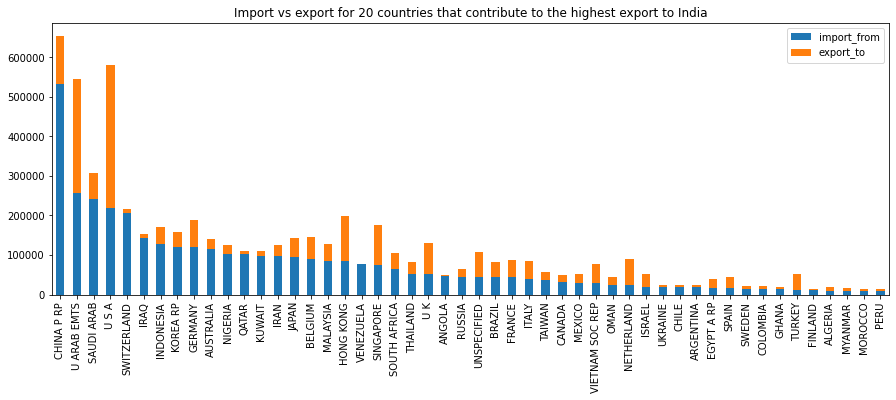

In [140]:
grouped1=exp.groupby("country")["value"].sum().reset_index()
grouped2=imp.groupby("country")["value"].sum().reset_index()
grouped=grouped1.merge(grouped2,on="country")
grouped.rename(columns={"value_x":"export_to","value_y":"import_from"},inplace=True)
grouped=grouped.sort_values("import_from",ascending=False).head(50)

grouped.plot(figsize=(15,5),kind="bar",x="country",y=["import_from","export_to"],xlabel="",stacked=True)
plt.title("Import vs export for 20 countries that contribute to the highest export to India")
plt.show()